In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
from keras.models import Model
from keras.layers.merge import concatenate

In [5]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato/Potato/Train",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato/Potato/Valid",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [10]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato/Potato/Test",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [11]:
class_names = train_ds.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 2 0 0 2 1 2 2 1 1 1 1 1 2 1 0 0 0 0 1 1 0 1 0 2 0 1 2 0 1 2]


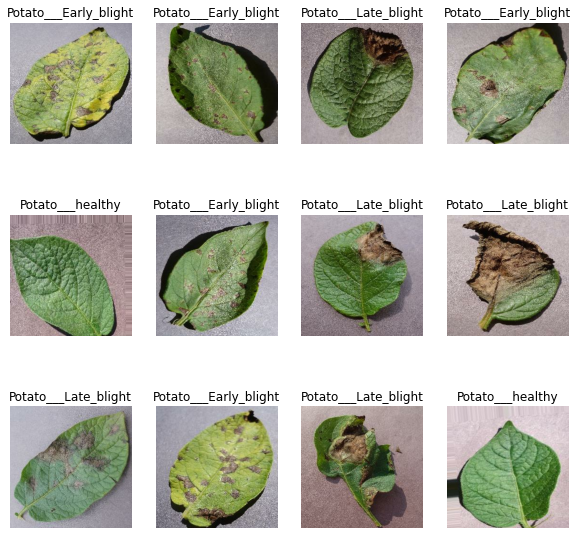

In [ ]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)     # all this is to improve the performacne
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)    
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)     

In [13]:
# lets do some preprocessing

In [14]:
'''
These layers are for preprocessing and we will use it later while model building. One is to resize the image and other divides
the size of 256 by 255 to get a number between 0 and 1
'''
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
'''
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.
'''
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
# model building I
# CNN

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 3s 82ms/step - loss: 1.0919 - accuracy: 0.3756 - val_loss: 1.0247 - val_accuracy: 0.6600
Epoch 2/50
29/29 [==============================] - 2s 75ms/step - loss: 0.8898 - accuracy: 0.5756 - val_loss: 0.8256 - val_accuracy: 0.6633
Epoch 3/50
29/29 [==============================] - 2s 75ms/step - loss: 0.7520 - accuracy: 0.6300 - val_loss: 0.5625 - val_accuracy: 0.7367
Epoch 4/50
29/29 [==============================] - 2s 75ms/step - loss: 0.7715 - accuracy: 0.6467 - val_loss: 0.5085 - val_accuracy: 0.7700
Epoch 5/50
29/29 [==============================] - 2s 75ms/step - loss: 0.4816 - accuracy: 0.7800 - val_loss: 0.3888 - val_accuracy: 0.8133
Epoch 6/50
29/29 [==============================] - 2s 75ms/step - loss: 0.4076 - accuracy: 0.8222 - val_loss: 0.4034 - val_accuracy: 0.8100
Epoch 7/50
29/29 [==============================] - 2s 79ms/step - loss: 0.3280 - accuracy: 0.8711 - val_loss: 0.5503 - val_accuracy: 0.7733
Epoch 8/50
29

In [ ]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 44s 31ms/step - loss: 0.0536 - accuracy: 0.9867


In [ ]:
scores

[0.05362182483077049, 0.9866666793823242]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 29}

In [ ]:
history.history

{'loss': [1.0919101238250732,
  0.8897691965103149,
  0.7520145773887634,
  0.7715222239494324,
  0.4815842807292938,
  0.4076214134693146,
  0.32799890637397766,
  0.35171186923980713,
  0.29287418723106384,
  0.26305100321769714,
  0.23236750066280365,
  0.21089573204517365,
  0.20139770209789276,
  0.1794985979795456,
  0.21849162876605988,
  0.24925492703914642,
  0.206875741481781,
  0.2027669996023178,
  0.1403200328350067,
  0.1056733950972557,
  0.11535905301570892,
  0.07698278874158859,
  0.19272074103355408,
  0.11891014128923416,
  0.16285377740859985,
  0.09295213967561722,
  0.045531146228313446,
  0.04744588956236839,
  0.07336966693401337,
  0.18277668952941895,
  0.1412341445684433,
  0.06857641786336899,
  0.14549213647842407,
  0.10377133637666702,
  0.060814402997493744,
  0.03366607427597046,
  0.057063985615968704,
  0.05514245480298996,
  0.047453880310058594,
  0.10214023292064667,
  0.061219580471515656,
  0.0547998882830143,
  0.024018345400691032,
  0.0791165

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

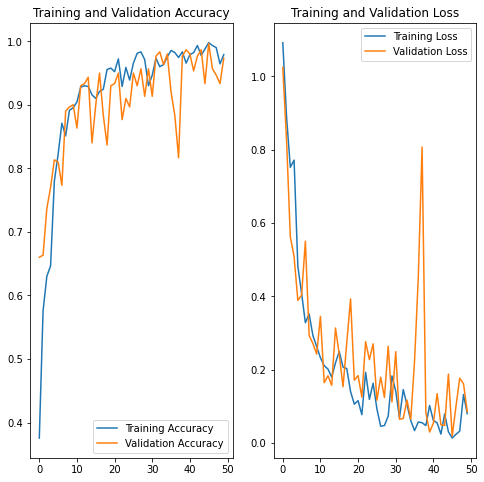

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


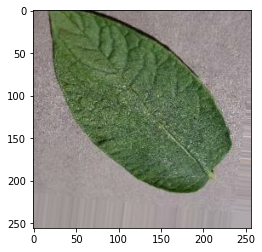

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

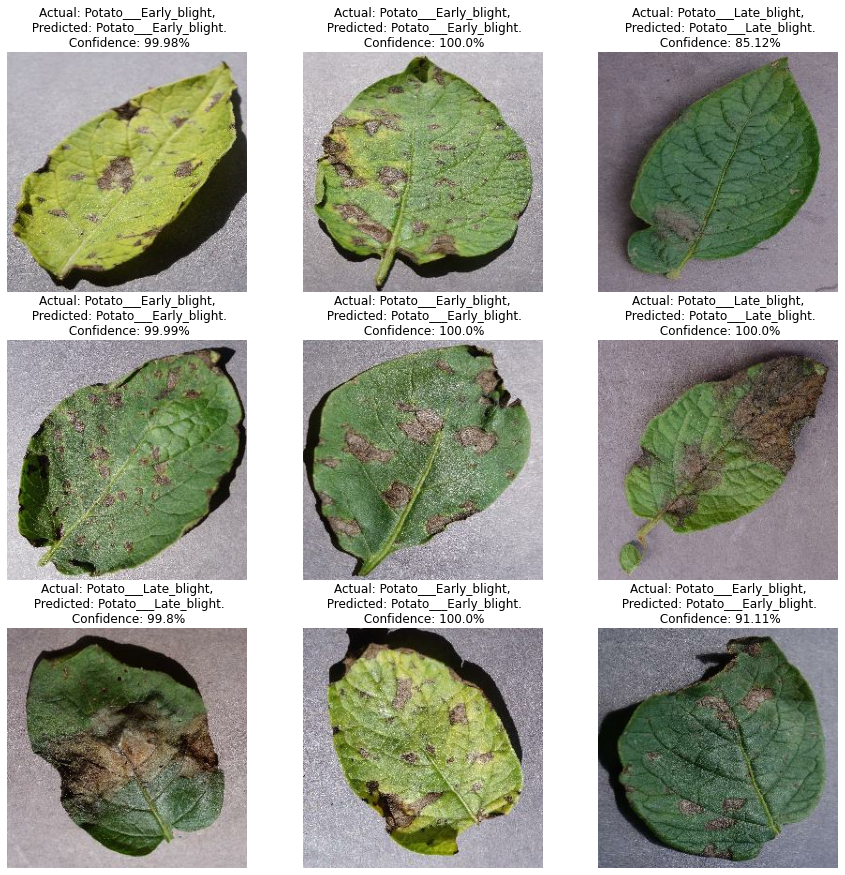

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save("/content/drive/MyDrive/DL sem7/potatoes.h5")

GoogleNet

In [16]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [ ]:
def GoogLeNet():
  #preprocessing layers
  resize_and_rescale,
  data_augmentation,
  # input layer 
  input_layer = Input(shape = (256, 256, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(10, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(3, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(10, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(3, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(3, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [ ]:
googlenet = GoogLeNet()

In [ ]:
googlenet.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_71 (Conv2D)             (None, 125, 125, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_25 (MaxPooling2D  (None, 62, 62, 64)  0           ['conv2d_71[0][0]']              
 )                                                                                        

In [ ]:
googlenet.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history_gnet = googlenet.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 14s 241ms/step - loss: 5.0078 - dense_13_loss: 1.5560 - dense_10_loss: 2.1372 - dense_12_loss: 1.3146 - dense_13_accuracy: 0.3389 - dense_10_accuracy: 0.3378 - dense_12_accuracy: 0.3222 - val_loss: 3.2945 - val_dense_13_loss: 1.0972 - val_dense_10_loss: 1.0986 - val_dense_12_loss: 1.0986 - val_dense_13_accuracy: 0.3333 - val_dense_10_accuracy: 0.3333 - val_dense_12_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 4s 135ms/step - loss: 3.2972 - dense_13_loss: 1.0999 - dense_10_loss: 1.0987 - dense_12_loss: 1.0986 - dense_13_accuracy: 0.3433 - dense_10_accuracy: 0.3222 - dense_12_accuracy: 0.3333 - val_loss: 3.2826 - val_dense_13_loss: 1.0853 - val_dense_10_loss: 1.0986 - val_dense_12_loss: 1.0986 - val_dense_13_accuracy: 0.3333 - val_dense_10_accuracy: 0.3333 - val_dense_12_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 4s 135ms/step - loss: 3.2908 - dense_13_loss: 1.0935 - dense_10_loss: 1.098

In [ ]:
scores_gnet = googlenet.evaluate(test_ds)

10/10 [==============================] - 1s 55ms/step - loss: 1.9895 - dense_13_loss: 0.3263 - dense_10_loss: 0.5672 - dense_12_loss: 1.0960 - dense_13_accuracy: 0.8833 - dense_10_accuracy: 0.7233 - dense_12_accuracy: 0.4000


In [ ]:
scores_gnet

[1.989498496055603,
 0.32625532150268555,
 0.5672229528427124,
 1.0960203409194946,
 0.8833333253860474,
 0.7233333587646484,
 0.4000000059604645]

In [ ]:
history_gnet

In [ ]:
history_gnet.params

{'verbose': 1, 'epochs': 50, 'steps': 29}

In [ ]:
history_gnet.history

{'loss': [5.007780075073242,
  3.297215223312378,
  3.290806531906128,
  3.3248488903045654,
  3.2997241020202637,
  3.2889387607574463,
  3.3074069023132324,
  3.2964975833892822,
  3.2981088161468506,
  3.295454740524292,
  3.2879981994628906,
  3.2995266914367676,
  3.2819554805755615,
  3.3005712032318115,
  3.2941291332244873,
  3.29121470451355,
  3.2938830852508545,
  3.2943196296691895,
  3.2959654331207275,
  3.2599680423736572,
  3.2959327697753906,
  3.2978076934814453,
  3.34265398979187,
  3.28867244720459,
  3.2920188903808594,
  3.2898921966552734,
  3.2884581089019775,
  3.2992100715637207,
  3.2946348190307617,
  3.2887160778045654,
  3.284910202026367,
  3.314570903778076,
  3.2911860942840576,
  3.263995409011841,
  3.2414586544036865,
  3.114978075027466,
  3.0871922969818115,
  2.9847686290740967,
  2.9554026126861572,
  2.8678059577941895,
  2.797241449356079,
  2.7818572521209717,
  2.7750861644744873,
  2.684495210647583,
  2.679830551147461,
  2.580321550369262

In [ ]:
acc = history_gnet.history['dense_13_accuracy']
val_acc = history_gnet.history['val_dense_13_accuracy']

loss = history_gnet.history['loss']
val_loss = history_gnet.history['val_loss']

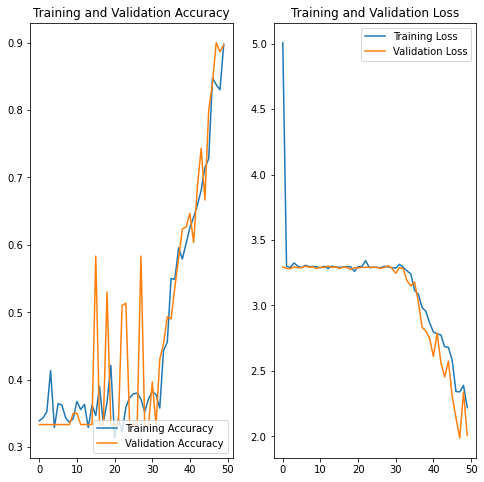

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


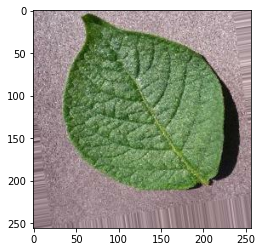

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = googlenet.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0][0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = googlenet.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0][0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

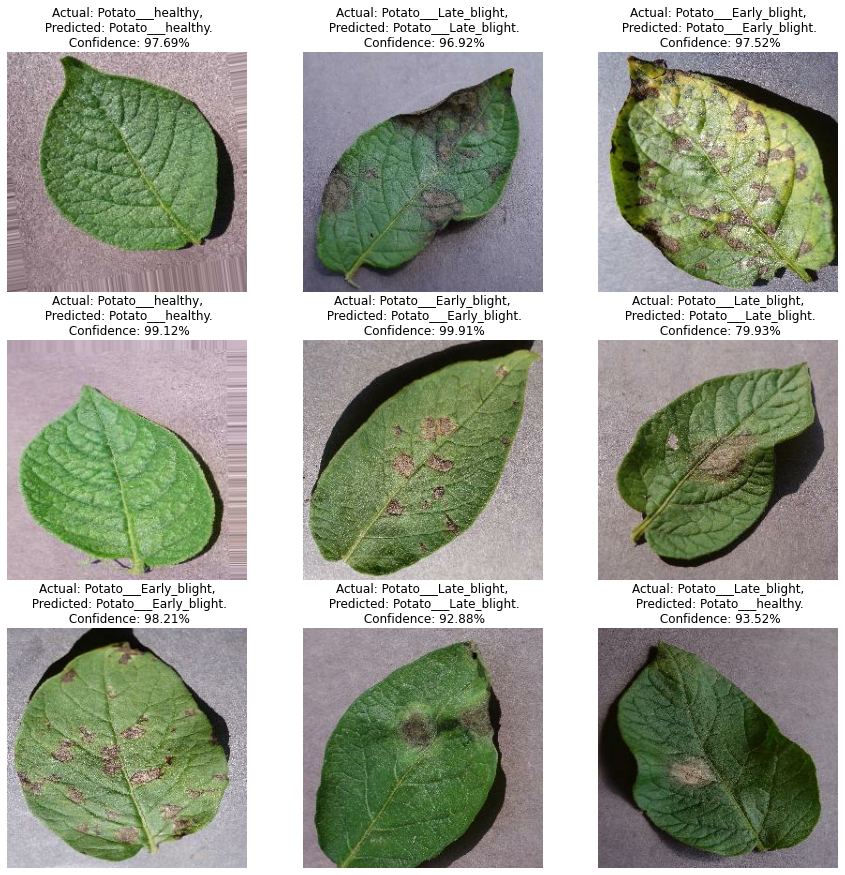

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(googlenet, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
googlenet.save("/content/drive/MyDrive/DL sem7/gnet_potatoes.h5")

resnet 50 model

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

resnet = models.Sequential()

resnet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=input_shape,
    classes=3
)

resnet.add(resize_and_rescale)
resnet.add(data_augmentation)
resnet.add(resnet50)

resnet.build(input_shape = (32, 256, 256, 3))

In [ ]:
resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 3)                 23593859  
                                                                 
Total params: 23,593,859
Trainable params: 23,540,739
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
resnet.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = resnet.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 299s 4s/step - loss: 1.0427 - accuracy: 0.7378 - val_loss: 1.6999 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 14s 474ms/step - loss: 0.2431 - accuracy: 0.9111 - val_loss: 3.0426 - val_accuracy: 0.3367
Epoch 3/50
29/29 [==============================] - 14s 474ms/step - loss: 0.2055 - accuracy: 0.9344 - val_loss: 1.6711 - val_accuracy: 0.4133
Epoch 4/50
29/29 [==============================] - 13s 458ms/step - loss: 0.2942 - accuracy: 0.9133 - val_loss: 2.9235 - val_accuracy: 0.5367
Epoch 5/50
29/29 [==============================] - 13s 460ms/step - loss: 0.1940 - accuracy: 0.9300 - val_loss: 3.7197 - val_accuracy: 0.3333
Epoch 6/50
29/29 [==============================] - 13s 460ms/step - loss: 0.1599 - accuracy: 0.9389 - val_loss: 3.3835 - val_accuracy: 0.3333
Epoch 7/50
29/29 [==============================] - 14s 472ms/step - loss: 0.0932 - accuracy: 0.9733 - val_loss: 4.9448 - val_accuracy: 0.3333
E

In [ ]:
scores = resnet.evaluate(test_ds)

10/10 [==============================] - 108s 124ms/step - loss: 11.4847 - accuracy: 0.3767


In [ ]:
scores

[11.484739303588867, 0.3766666650772095]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 29}

In [ ]:
history.history

{'loss': [1.0427056550979614,
  0.243125781416893,
  0.2054830938577652,
  0.29420197010040283,
  0.19395442306995392,
  0.1598983108997345,
  0.09324758499860764,
  0.07776341587305069,
  0.15994484722614288,
  0.3121490478515625,
  0.16505153477191925,
  0.15291953086853027,
  0.0949588268995285,
  0.07384292036294937,
  0.0672161653637886,
  0.07203225791454315,
  0.05564410239458084,
  0.04234248399734497,
  0.06015307828783989,
  0.030428366735577583,
  0.12956863641738892,
  0.056146446615457535,
  0.05333349481225014,
  0.03765886649489403,
  0.041120316833257675,
  0.04720837622880936,
  0.03107859008014202,
  0.03921915218234062,
  0.03844593092799187,
  0.029911287128925323,
  0.05233795940876007,
  0.054248444736003876,
  0.05297062173485756,
  0.0555252879858017,
  0.04369674250483513,
  0.02468491718173027,
  0.0219567958265543,
  0.03344811126589775,
  0.03197981044650078,
  0.027643883600831032,
  0.017795709893107414,
  0.02417757175862789,
  0.04539173096418381,
  0.07

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

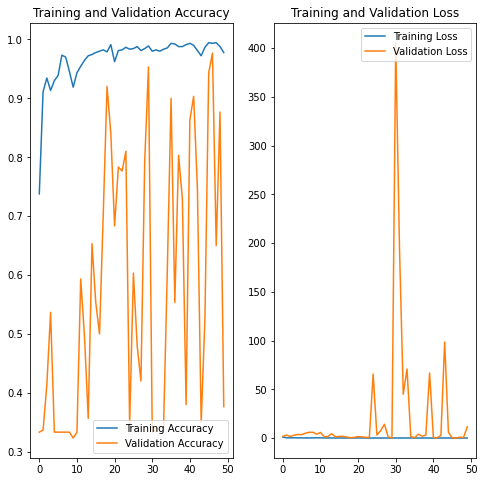

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___Early_blight


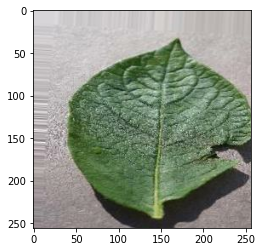

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = resnet.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

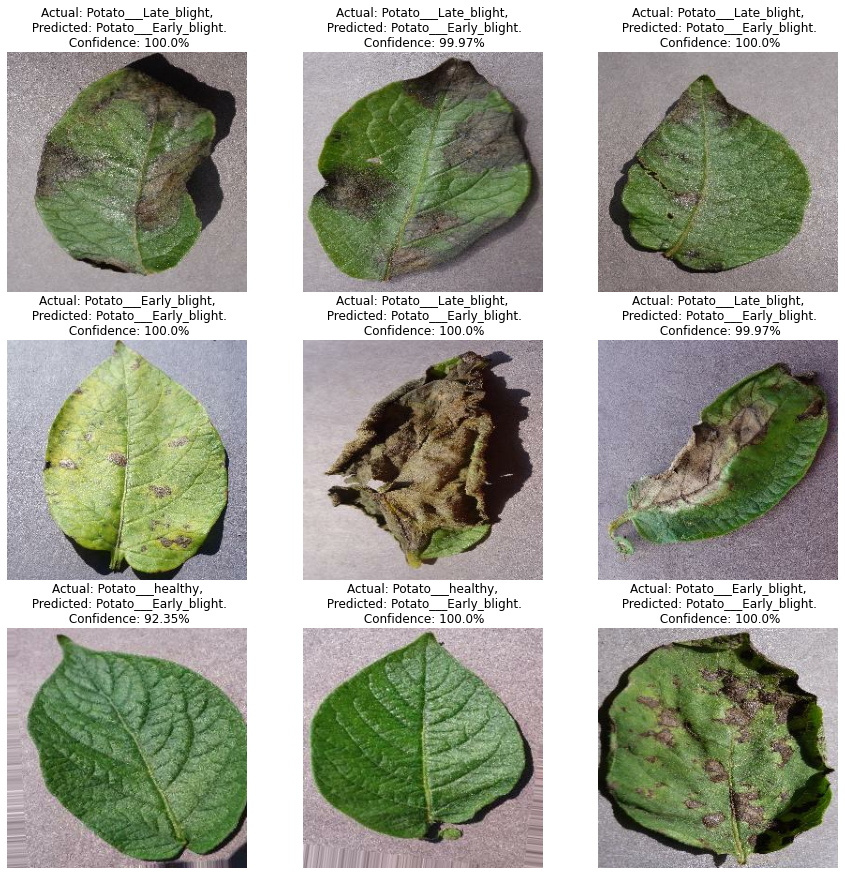

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(resnet, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
resnet.save("/content/drive/MyDrive/DL sem7/resnet_potatoes.h5")

VGG16

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

vgg = models.Sequential()

vgg16 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_shape=input_shape,
    classes=3,
    classifier_activation="softmax",
)

vgg.add(resize_and_rescale)
vgg.add(data_augmentation)
vgg.add(vgg16)

vgg.build(input_shape = (32, 256, 256, 3))

In [ ]:
vgg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 3)                 165730115 
                                                                 
Total params: 165,730,115
Trainable params: 165,730,115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vgg.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = vgg.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 32s 758ms/step - loss: 2.0048 - accuracy: 0.2978 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 18s 608ms/step - loss: 1.1001 - accuracy: 0.3289 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 18s 618ms/step - loss: 1.0991 - accuracy: 0.3333 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 4/50
29/29 [==============================] - 18s 616ms/step - loss: 1.0991 - accuracy: 0.3333 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 5/50
29/29 [==============================] - 18s 610ms/step - loss: 1.0992 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 6/50
29/29 [==============================] - 18s 608ms/step - loss: 1.0994 - accuracy: 0.3333 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 7/50
29/29 [==============================] - 18s 613ms/step - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0989 - val_accuracy: 0.3333

In [ ]:
scores = vgg.evaluate(test_ds)

10/10 [==============================] - 2s 187ms/step - loss: 1.0989 - accuracy: 0.3333


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

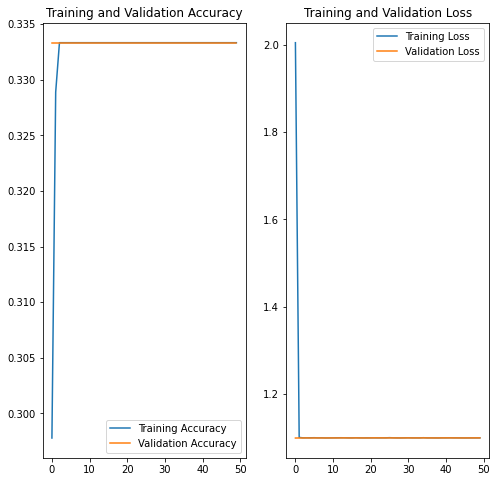

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


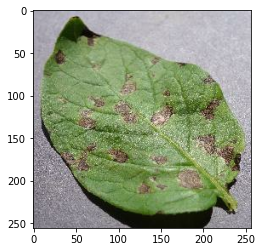

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = vgg.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

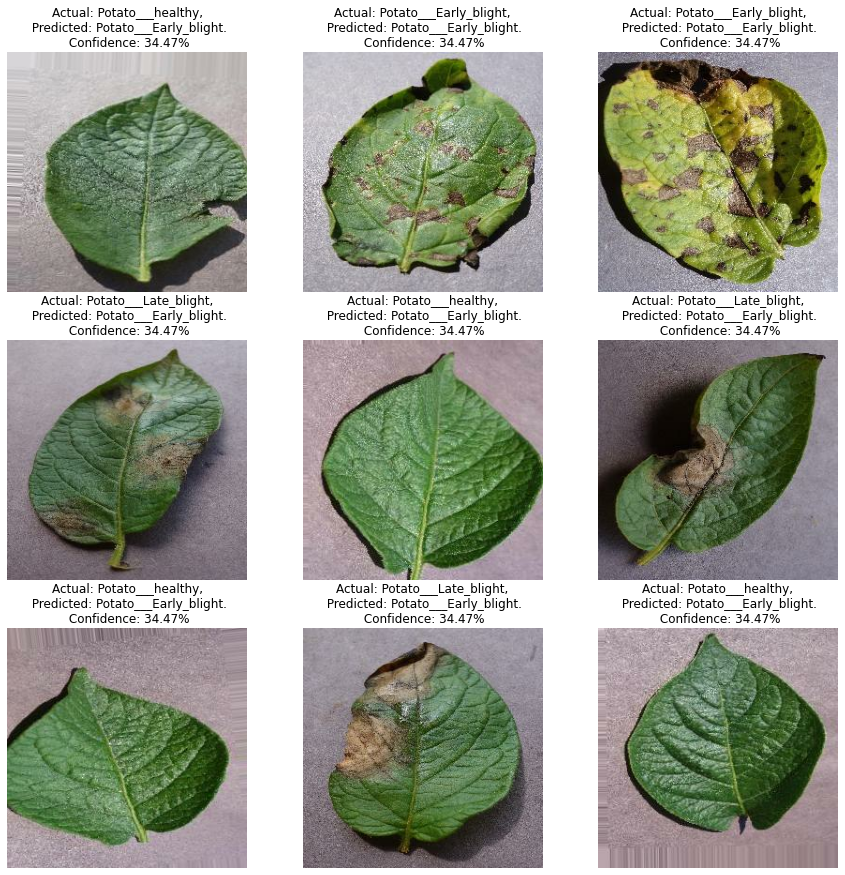

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(vgg, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
vgg.save("/content/drive/MyDrive/DL sem7/vgg_potatoes.h5")

In [ ]:
# Model building part II 
# transfer learning
# resnet

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

resnet_model = models.Sequential()

pretrained_model = tf.keras.applications.ResNet50(
                   include_top=False,
                   input_shape=input_shape,
                   pooling='avg',
                   classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(resize_and_rescale)
resnet_model.add(data_augmentation)
resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(7, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.build(input_shape = (32, 256, 256, 3))

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (32, 2048)                0         
                                                                 
 dense (Dense)               (32, 512)                 1049088   
                                                                 
 dense_1 (Dense)             (32, 7)                   3591      
                                                                 
Total params: 24,640,391
Trainable params: 1,052,679
N

In [ ]:
resnet_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = resnet_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 9s 202ms/step - loss: 1.1759 - accuracy: 0.3722 - val_loss: 1.0159 - val_accuracy: 0.5067
Epoch 2/50
29/29 [==============================] - 5s 171ms/step - loss: 1.0331 - accuracy: 0.4433 - val_loss: 1.0943 - val_accuracy: 0.5600
Epoch 3/50
29/29 [==============================] - 5s 170ms/step - loss: 1.0776 - accuracy: 0.4456 - val_loss: 0.9976 - val_accuracy: 0.5500
Epoch 4/50
29/29 [==============================] - 5s 172ms/step - loss: 0.9719 - accuracy: 0.5222 - val_loss: 0.9114 - val_accuracy: 0.5467
Epoch 5/50
29/29 [==============================] - 5s 174ms/step - loss: 0.9075 - accuracy: 0.5956 - val_loss: 0.9037 - val_accuracy: 0.5700
Epoch 6/50
29/29 [==============================] - 5s 172ms/step - loss: 0.9115 - accuracy: 0.5411 - val_loss: 0.9114 - val_accuracy: 0.5400
Epoch 7/50
29/29 [==============================] - 5s 172ms/step - loss: 0.9027 - accuracy: 0.5533 - val_loss: 0.8384 - val_accuracy: 0.5467
Epoch 

In [ ]:
scores = resnet_model.evaluate(test_ds)

10/10 [==============================] - 1s 112ms/step - loss: 0.7275 - accuracy: 0.6500


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

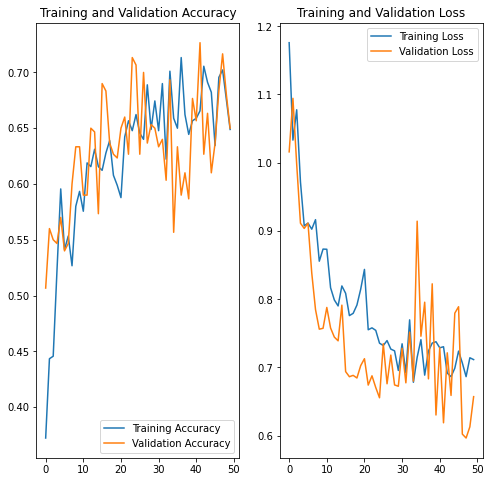

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
resnet_model.save("/content/drive/MyDrive/DL sem7/resnet_tflr_potatoes.h5")

In [ ]:
# VGG

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

vgg16_model = models.Sequential()

pretrained_model = tf.keras.applications.VGG16(
                   include_top=False,
                   input_shape=input_shape,
                   pooling='avg',
                   classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(resize_and_rescale)
vgg16_model.add(data_augmentation)
vgg16_model.add(pretrained_model)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dense(7, activation='softmax'))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_model.build(input_shape = (32, 256, 256, 3))

In [ ]:
vgg16_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (32, 512)                 0         
                                                                 
 dense_2 (Dense)             (32, 512)                 262656    
                                                                 
 dense_3 (Dense)             (32, 7)                   3591      
                                                                 
Total params: 14,980,935
Trainable params: 266,247
Non

In [ ]:
vgg16_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = vgg16_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 9s 254ms/step - loss: 0.9864 - accuracy: 0.5222 - val_loss: 0.7414 - val_accuracy: 0.6100
Epoch 2/50
29/29 [==============================] - 7s 249ms/step - loss: 0.5757 - accuracy: 0.8133 - val_loss: 0.5628 - val_accuracy: 0.7567
Epoch 3/50
29/29 [==============================] - 7s 253ms/step - loss: 0.4293 - accuracy: 0.8711 - val_loss: 0.5340 - val_accuracy: 0.7633
Epoch 4/50
29/29 [==============================] - 7s 251ms/step - loss: 0.3495 - accuracy: 0.9033 - val_loss: 0.3448 - val_accuracy: 0.9233
Epoch 5/50
29/29 [==============================] - 7s 252ms/step - loss: 0.3016 - accuracy: 0.9022 - val_loss: 0.2996 - val_accuracy: 0.9300
Epoch 6/50
29/29 [==============================] - 7s 254ms/step - loss: 0.2513 - accuracy: 0.9356 - val_loss: 0.3083 - val_accuracy: 0.8900
Epoch 7/50
29/29 [==============================] - 7s 254ms/step - loss: 0.2240 - accuracy: 0.9322 - val_loss: 0.2998 - val_accuracy: 0.8767
Epoch 

In [ ]:
scores = vgg16_model.evaluate(test_ds)

10/10 [==============================] - 2s 182ms/step - loss: 0.0604 - accuracy: 0.9833


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

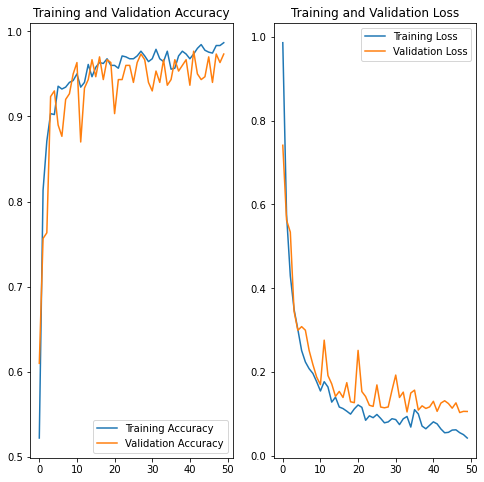

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
vgg16_model.save("/content/drive/MyDrive/DL sem7/vgg_tflr_potatoes.h5")

In [ ]:
# Xception model

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

xception_model = models.Sequential()

pretrained_model = tf.keras.applications.Xception(
                   include_top=False,
                   input_shape=input_shape,
                   pooling='avg',
                   classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

xception_model.add(resize_and_rescale)
xception_model.add(data_augmentation)
xception_model.add(pretrained_model)
xception_model.add(layers.Flatten())
xception_model.add(layers.Dense(512, activation='relu'))
xception_model.add(layers.Dense(7, activation='softmax'))

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
xception_model.build(input_shape = (32, 256, 256, 3))

In [ ]:
xception_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_2 (Flatten)         (32, 2048)                0         
                                                                 
 dense_4 (Dense)             (32, 512)                 1049088   
                                                                 
 dense_5 (Dense)             (32, 7)                   3591      
                                                                 
Total params: 21,914,159
Trainable params: 1,052,679
N

In [ ]:
xception_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = xception_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 12s 277ms/step - loss: 0.4673 - accuracy: 0.8100 - val_loss: 0.2165 - val_accuracy: 0.9200
Epoch 2/50
29/29 [==============================] - 6s 211ms/step - loss: 0.1717 - accuracy: 0.9400 - val_loss: 0.1959 - val_accuracy: 0.9267
Epoch 3/50
29/29 [==============================] - 6s 211ms/step - loss: 0.1712 - accuracy: 0.9333 - val_loss: 0.1389 - val_accuracy: 0.9433
Epoch 4/50
29/29 [==============================] - 6s 214ms/step - loss: 0.1487 - accuracy: 0.9411 - val_loss: 0.1220 - val_accuracy: 0.9600
Epoch 5/50
29/29 [==============================] - 6s 216ms/step - loss: 0.1147 - accuracy: 0.9533 - val_loss: 0.1306 - val_accuracy: 0.9633
Epoch 6/50
29/29 [==============================] - 6s 217ms/step - loss: 0.0972 - accuracy: 0.9700 - val_loss: 0.2211 - val_accuracy: 0.9200
Epoch 7/50
29/29 [==============================] - 6s 216ms/step - loss: 0.1441 - accuracy: 0.9456 - val_loss: 0.1060 - val_accuracy: 0.9633
Epoch

In [ ]:
scores = xception_model.evaluate(test_ds)

10/10 [==============================] - 2s 149ms/step - loss: 0.1308 - accuracy: 0.9600


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

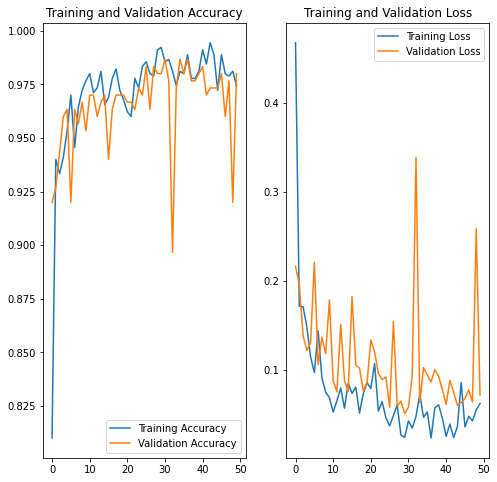

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
xception_model.save("/content/drive/MyDrive/DL sem7/xception_tflr_potatoes.h5")

In [16]:
# model building part III
# Improved/New DL model
# stacking ensemble technique resnet and googlenet (both on same dataset)

In [17]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [18]:
resnet_model = models.Sequential()
resnet50 = tf.keras.applications.ResNet50(
                   include_top=True,
                   input_shape=input_shape,
                   pooling='avg',
                   classes=3,
                   weights=None)

resnet_model.add(resize_and_rescale)
resnet_model.add(data_augmentation)
resnet_model.add(resnet50)

resnet_model.build(input_shape = (32, 256, 256, 3))
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 3)                 23593859  
                                                                 
Total params: 23,593,859
Trainable params: 23,540,739
Non-trainable params: 53,120
_________________________________________________________________


In [19]:
# googlenet model
def GoogLeNet():
  #preprocessing layers
  resize_and_rescale,
  data_augmentation,
  # input layer 
  input_layer = Input(shape = (256, 256, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(10, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(3, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(10, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(3, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(3, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X], name = 'GoogLeNet')

  return model

googlenet = GoogLeNet()
googlenet.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 125, 125, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 62, 62, 64)   0           ['conv2d[0][0]']                 
                                                                                          

                                                                                                  
 conv2d_24 (Conv2D)             (None, 14, 14, 224)  226016      ['conv2d_23[0][0]']              
                                                                                                  
 conv2d_26 (Conv2D)             (None, 14, 14, 64)   38464       ['conv2d_25[0][0]']              
                                                                                                  
 conv2d_27 (Conv2D)             (None, 14, 14, 64)   32832       ['max_pooling2d_6[0][0]']        
                                                                                                  
 concatenate_3 (Concatenate)    (None, 14, 14, 512)  0           ['conv2d_22[0][0]',              
                                                                  'conv2d_24[0][0]',              
                                                                  'conv2d_26[0][0]',              
          

 conv2d_51 (Conv2D)             (None, 6, 6, 128)    102528      ['conv2d_50[0][0]']              
                                                                                                  
 conv2d_52 (Conv2D)             (None, 6, 6, 128)    106624      ['max_pooling2d_11[0][0]']       
                                                                                                  
 concatenate_7 (Concatenate)    (None, 6, 6, 832)    0           ['conv2d_47[0][0]',              
                                                                  'conv2d_49[0][0]',              
                                                                  'conv2d_51[0][0]',              
                                                                  'conv2d_52[0][0]']              
                                                                                                  
 conv2d_54 (Conv2D)             (None, 6, 6, 192)    159936      ['concatenate_7[0][0]']          
          

In [27]:
models = [resnet_model, googlenet] #stacking individual models in a list
model_input = tf.keras.Input(shape=(256, 256, 3)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [28]:
ensemble_model.summary() #prints a comprehensive summary of the Keras model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_3 (Sequential)      (None, 3)            23593859    ['input_6[0][0]']                
                                                                                                  
 GoogLeNet (Functional)         (None, 3)            5976627     ['input_6[0][0]']                
                                                                                                  
 average (Average)              (None, 3)            0           ['sequential_3[0][0]',       

In [ ]:
ensemble_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = ensemble_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 207s 2s/step - loss: 1.0100 - accuracy: 0.6367 - val_loss: 1.3457 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 16s 538ms/step - loss: 0.6011 - accuracy: 0.8189 - val_loss: 1.3658 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 16s 546ms/step - loss: 0.5128 - accuracy: 0.8633 - val_loss: 1.1280 - val_accuracy: 0.3333
Epoch 4/50
29/29 [==============================] - 16s 548ms/step - loss: 0.5852 - accuracy: 0.8322 - val_loss: 1.1807 - val_accuracy: 0.3333
Epoch 5/50
29/29 [==============================] - 16s 545ms/step - loss: 0.5602 - accuracy: 0.8267 - val_loss: 1.1936 - val_accuracy: 0.3333
Epoch 6/50
29/29 [==============================] - 16s 540ms/step - loss: 0.4625 - accuracy: 0.8733 - val_loss: 1.5271 - val_accuracy: 0.3333
Epoch 7/50
29/29 [==============================] - 16s 544ms/step - loss: 0.4385 - accuracy: 0.8778 - val_loss: 1.1225 - val_accuracy: 0.3333
E

In [ ]:
scores = ensemble_model.evaluate(test_ds)

10/10 [==============================] - 43s 150ms/step - loss: 0.5003 - accuracy: 0.8000


In [ ]:
ensemble_model.save("/content/drive/MyDrive/DL sem7/ensemble1_tflr_potatoes.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

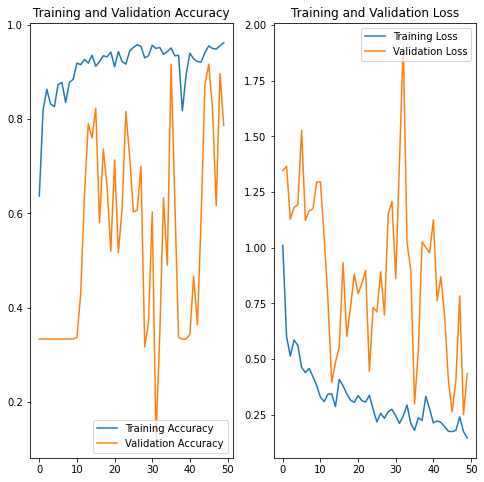

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
# model building part III
# Improved/New DL model
# stacking ensemble technique resnet,vgg16,Xception, googlenet (all on same dataset)

In [20]:
vgg16_model = models.Sequential()
vgg16 = tf.keras.applications.VGG16(
                   include_top=True,
                   input_shape=input_shape,
                   pooling='avg',
                   classes=3,
                   weights=None)

vgg16_model.add(resize_and_rescale)
vgg16_model.add(data_augmentation)
vgg16_model.add(vgg16)

vgg16_model.build(input_shape = (32, 256, 256, 3))
vgg16_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 3)                 165730115 
                                                                 
Total params: 165,730,115
Trainable params: 165,730,115
Non-trainable params: 0
_________________________________________________________________


In [21]:
xception_model = models.Sequential()
xception = tf.keras.applications.Xception(
                   include_top=True,
                   input_shape=input_shape,
                   pooling='avg',
                   classes=3,
                   weights=None)

xception_model.add(resize_and_rescale)
xception_model.add(data_augmentation)
xception_model.add(xception)

xception_model.build(input_shape = (32, 256, 256, 3))
xception_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 xception (Functional)       (None, 3)                 20867627  
                                                                 
Total params: 20,867,627
Trainable params: 20,813,099
Non-trainable params: 54,528
_________________________________________________________________


In [22]:
models = [resnet_model, googlenet, vgg16_model, xception_model] #stacking individual models in a list
model_input = tf.keras.Input(shape=(256, 256, 3)) #takes a list of tensors as input, all of the same shape
model_outputs = [model(model_input) for model in models] #collects outputs of models in a list
ensemble_output = tf.keras.layers.Average()(model_outputs) #averaging outputs
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [23]:
ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_2 (Sequential)      (None, 3)            23593859    ['input_5[0][0]']                
                                                                                                  
 GoogLeNet (Functional)         (None, 3)            5976627     ['input_5[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 3)            165730115   ['input_5[0][0]']            

In [24]:
ensemble_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = ensemble_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
 1/29 [>.............................] - ETA: 1:15:29 - loss: 1.1003 - accuracy: 0.4375

KeyboardInterrupt: 